# Task 1: Introduction

In [464]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [465]:
def generate_examples(num=1000):
# Trọng số    
    W = [1., -3.]
    b = 1.
# Reshape W để có kích thước (2, 1)
    W = np.reshape(W, (2,1))
# Tạo ma trận đặc trưng X ngẫu nhiên với kích thước (num, 2)    
    X = np.random.randn(num,2)
# Tính đầu ra y sử dụng trọng số W và độ dồn b
    y = b + np.dot(X,W)
# Reshape y để có kích thước (num, 1)
    y = np.reshape(y, (num,1))

    return X,y

In [466]:
# Gọi hàm generate_examples và hiển thị kích thước của X và y
X,y = generate_examples()
print(X.shape,y.shape)

(1000, 2) (1000, 1)


In [467]:
# In ra một điểm dữ liệu ví dụ
print(X[0], y[0])

[-1.37719035 -0.40036732] [0.8239116]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [468]:
class Model:
    def __init__(self, num_features):
# Khởi tạo một đối tượng Model với số lượng đặc trưng được chỉ định.
        self.num_features = num_features
# Khởi tạo ma trận trọng số W với kích thước (num_features, 1) và giá trị ngẫu nhiên.
        self.W = np.random.randn(num_features,1)
# Khởi tạo độ dồn (bias) b với giá trị ngẫu nhiên.
        self.b = np.random.randn()

In [469]:
# Tạo một đối tượng Model với 2 đặc trưng
model = Model(2)
# In ra ma trận trọng số W và độ dồn b
print(model.W)
print(model.b)

[[0.357124  ]
 [0.14015904]]
-0.42171489198858736


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param]

<img src="https://i.imgur.com/igQaIB8.png" alt="Loss vs Param" width="400"/>


The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [470]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [471]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [472]:
class Model(Model):
    def compute_loss(self, y_hat,y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [473]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [474]:
loss

5.236300816177181

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [475]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m) * np.sum(y_hat - y_true)
        dW = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true),X), axis=0)
        return dW, db

In [476]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)
dW, db = model.backward_pass(X, y, y_hat)

In [477]:
print(dW,db)

[-0.20200196  2.03000862] -0.11634469951779502


# Task 7: Update Parameters

In [478]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

# Task 8: Training Loop

In [479]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0,iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)  
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0 :
                print('Iterations: {}, Loss: {:.4f}'.format(i, loss))  
        return losses

In [480]:
model = Model(2)

In [481]:
x_train, y_train = generate_examples()

In [482]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iterations: 0, Loss: 3.9216
Iterations: 100, Loss: 0.6755
Iterations: 200, Loss: 0.3629
Iterations: 300, Loss: 0.1950
Iterations: 400, Loss: 0.1048
Iterations: 500, Loss: 0.0563
Iterations: 600, Loss: 0.0303
Iterations: 700, Loss: 0.0163
Iterations: 800, Loss: 0.0087
Iterations: 900, Loss: 0.0047


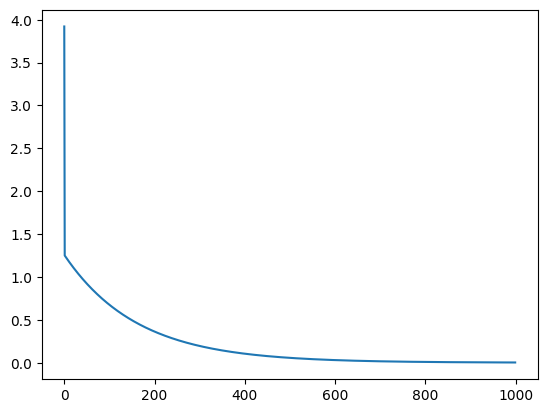

In [483]:
plt.plot(losses)

# Task 9: Predictions

In [484]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [485]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

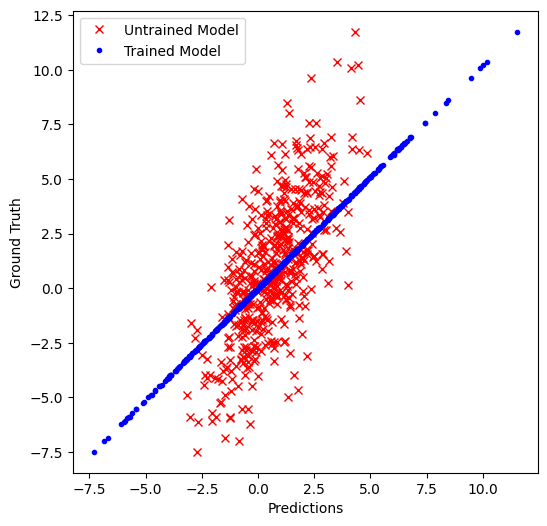

In [486]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained Model')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained Model')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()